In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df15c = pd.read_csv(os.path.join('df15.csv'))
del df15c['Unnamed: 0']
del df15c['Year']
del df15c['Month']
del df15c['Day']
del df15c['Day_of_Week']
del df15c['Weekend']
del df15c['Datetime']

df15c.head()

,MW,Utility,Temp(f)
0,9893.0,COMED,30.00
1,9544.0,COMED,30.20
2,9318.0,COMED,28.99
3,9507.0,COMED,30.20
4,9992.0,COMED,28.99


In [5]:
df_2015pos = df15c[df15c['Temp(f)'] >= 60].copy()
df_2015neg = df15c[df15c['Temp(f)'] < 60].copy()

In [6]:
X = df_2015pos["Temp(f)"].values.reshape(-1, 1)
y = df_2015pos["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (2459, 1) (2459, 1)


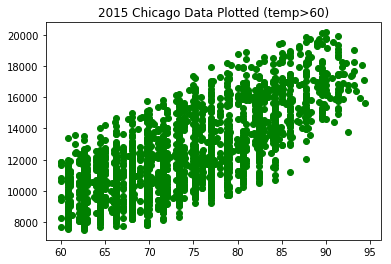

In [7]:
plt.scatter(X, y,color='g')
plt.title("2015 Chicago Data Plotted (temp>60)")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [16]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5275313533604689
Testing Score: 0.5253769515561699


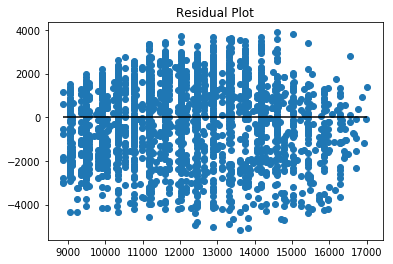

In [17]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

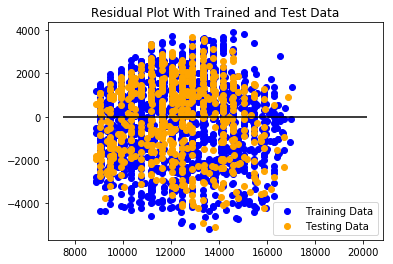

In [18]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [19]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[236.56181751]]
y-axis intercept:  [-5329.0032418]


In [20]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  -5329.0032418+ 236.56181751 * x_min
y_max = -5329.0032418+ 236.56181751 * x_max

Actual Min Value: 7506.0
Predicted Min Value: [[8867.0714268]]
Actual Max Value: 20162.0
Predicted Max Value: [[17016.62603992]]


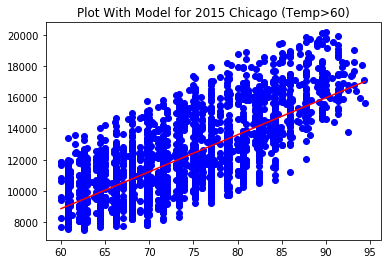

In [21]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2015 Chicago (Temp>60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [23]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [11621.]
Predicted output: [9479.76653414]
Prediction Error: [-2141.23346586]


In [46]:
X = df_2015neg["Temp(f)"].values.reshape(-1, 1)
y = df_2015neg["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (1134, 1) (1134, 1)


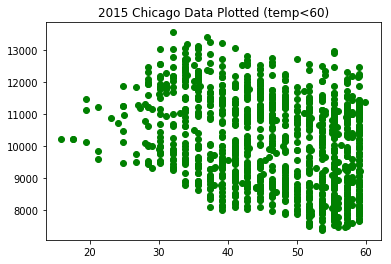

In [33]:
plt.scatter(X, y,color='g')
plt.title("2015 Chicago Data Plotted (temp<60)")
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

In [37]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.10219740047647585
Testing Score: 0.021368929300272677


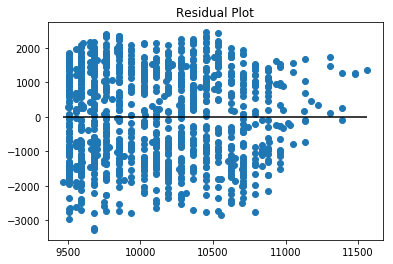

In [38]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

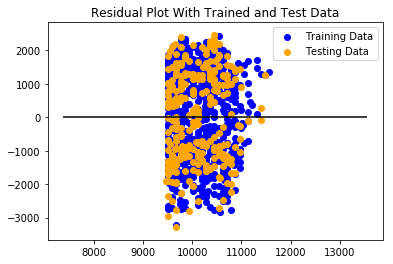

In [39]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [40]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-47.55298845]]
y-axis intercept:  [12313.9668237]


In [42]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  12313.9668237+ (-47.55298845 * x_min)
y_max = 12313.9668237+ (-47.55298845 * x_max)

Actual Min Value: 7376.0
Predicted Min Value: [[11562.6296062]]
Actual Max Value: 13553.0
Predicted Max Value: [[9466.49387535]]


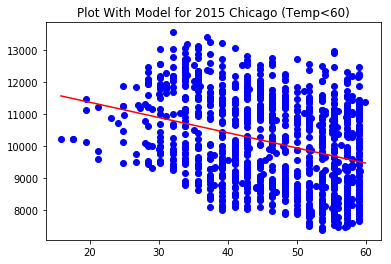

In [47]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2015 Chicago (Temp<60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [45]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [9893.]
Predicted output: [10887.37717022]
Prediction Error: [994.37717022]


In [48]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [49]:
modeldf

,Actual,Error,Predicted
0,9893.0,994.377170,10887.377170
1,9544.0,1333.866573,10877.866573
2,9318.0,1617.405689,10935.405689
3,9507.0,1370.866573,10877.866573
4,9992.0,943.405689,10935.405689
5,10692.0,185.866573,10877.866573
6,10984.0,-106.133427,10877.866573
7,11162.0,-226.594311,10935.405689
8,11306.0,-323.516853,10982.483147
9,11273.0,-242.963864,11030.036136
